# import libraries

In [1]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# gamma_pop

## dust + sulfate - sea salt

In [2]:
# no seasalt & dust
gamma_pop_nsd = np.zeros((2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            sce = int(filename[-29:-27])
            if (ncf.variables["gamma_pop_pr"].shape[0] != 49):
                print(sce)
                pass
            else:
                gamma_pop_nsd[0, sce, :] = ncf.variables["gamma_pop_pr"].data
                gamma_pop_nsd[1, sce, :] = ncf.variables["gamma_pop_comp"].data
                time = ncf.variables["time"].data/3600

gamma_pop_nsd_error = (gamma_pop_nsd[1,:,:].ravel() - 
               gamma_pop_nsd[0,:,:].ravel())/gamma_pop_nsd[0,:,:].ravel()    

d_wds = {"gamma_pop_ref": gamma_pop_nsd[0,:,:].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop_nsd[1,:,:].ravel(),
         "gamma_pop_error": gamma_pop_nsd_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_wds= pd.DataFrame(data=d_wds)
print(df_wds.shape)

df_wds_2ndngt = df_wds[((df_wds.index.values % 49) >=37) & ((df_wds.index.values % 49) <= 48)]
print(df_wds_2ndngt.shape)

df2 = df_wds_2ndngt.dropna()
print(df2.shape)
null_data = df_wds_2ndngt[df_wds_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

df3 = df_wds.dropna()
print(df3.shape)

78
46
(4900, 3)
(1200, 3)
(510, 3)
[ 0  0  0  0  0  0  0  0  0  0  0  0  4  4  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18
 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 20
 21 21 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 22 22 22
 24 24 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 25 25
 26 26 26 27 27 27 27 27 30 30 30 30 30 30 30 30 30 30 30 30 31 31 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 32 32 33 33 33 33
 33 33 33 33 33 33 33 33 36 36 36 36 36 36 36 36 36 36 36 36 38 38 38 38
 38 38 38 38 38 38 38 38 39 39 39 39 39 39 39 39 39 39 39 39 40 40 40 40
 40 40 40 40 40 40 40 40 41 41 41 41 41 41 41 41 41 41 41 41 45 45 45 45
 46 46 46 46 46 

In [3]:
wds_case_index = df2.index.values
wds_sce_index  = (wds_case_index/49).astype(int)
wds_hour_index = wds_case_index % 49

df_wdson = df2[((np.abs(df2["gamma_pop_error"])) <= 20)]
df_wdsabove = df2[((df2["gamma_pop_error"]) > 20)]
df_wdsbelow = df2[((df2["gamma_pop_error"]) < -20)]
print(df_wdson.shape, df_wdsabove.shape, df_wdsbelow.shape)

wdsall_case_index = df3.index.values
wdsall_sce_index  = (wdsall_case_index/49).astype(int)
wdsall_hour_index = wdsall_case_index % 49

df_wdsallon = df3[((np.abs(df3["gamma_pop_error"])) <= 20)]
df_wdsallabove = df3[((df3["gamma_pop_error"]) > 20)]
df_wdsallbelow = df3[((df3["gamma_pop_error"]) < -20)]
print(df_wdsallon.shape, df_wdsallabove.shape, df_wdsallbelow.shape)

(475, 3) (21, 3) (14, 3)
(2007, 3) (128, 3) (73, 3)


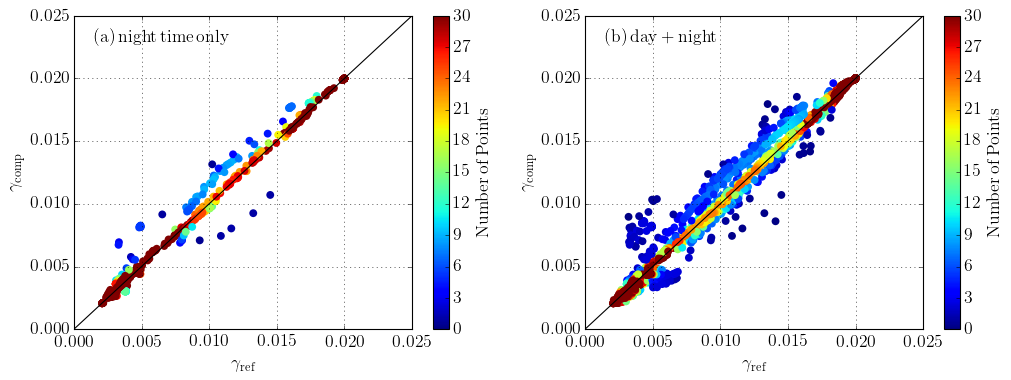

In [4]:
# Only nighttime cases

from scipy.stats import gaussian_kde
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df2["gamma_pop_ref"]
y = df2["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=30)
cbar = plt.colorbar()
cbar.set_label(r'$\rm Number\,of\,Points$')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (a)\,night \,time \,only$')
plt.grid()
###################
plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df3["gamma_pop_ref"]
y = df3["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=30)
cbar = plt.colorbar()
cbar.set_label(r'$\rm Number\,of\,Points$')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (b)\,day + night$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')

# bulk masses

In [5]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
dtype: object
bulk_no3_masses


In [6]:
# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875'
bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            if (ncf.variables['bulk_no3_masses'].shape[0] != 49):
                print(sce)
                pass
            else:
                for i in range(10):
                    bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                    bulk_masses[11, sce, :] = ncf.variables['tot_drymass_conc'].data * 1e9

d_wdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df_wdm = pd.DataFrame(data=d_wdm)
print(df_wdm.shape)
df_wdm_2ndngt = df_wdm[((df_wdm.index.values % 49) >= 37) & ((df_wdm.index.values % 49) <= 48)]  # ngt: night
print(df_wdm_2ndngt.shape)

no3 = sum(bulk_masses[0,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
so4 = sum(bulk_masses[1,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
oc = sum(bulk_masses[2,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
soa = sum(bulk_masses[3,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
nh4 = sum(bulk_masses[4,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
na = sum(bulk_masses[5,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
cl = sum(bulk_masses[6,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
bc = sum(bulk_masses[7,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
oin = sum(bulk_masses[8,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
ca = sum(bulk_masses[9,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
co3 = sum(bulk_masses[10,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3)

78
46
(4900, 10)
(1200, 10)
no3: 0.16739488640018807
so4: 0.0273312006628406
oc: 0.05256224751869735
soa: 0.030243271083828325
nh4: 0.0592024495111474
na: 0.0
cl: 0.005471555723478097
bc: 0.1650426258859007
oin: 0.4927517632139214
ca: 0.0
co3: 0.0
1.000000000000002


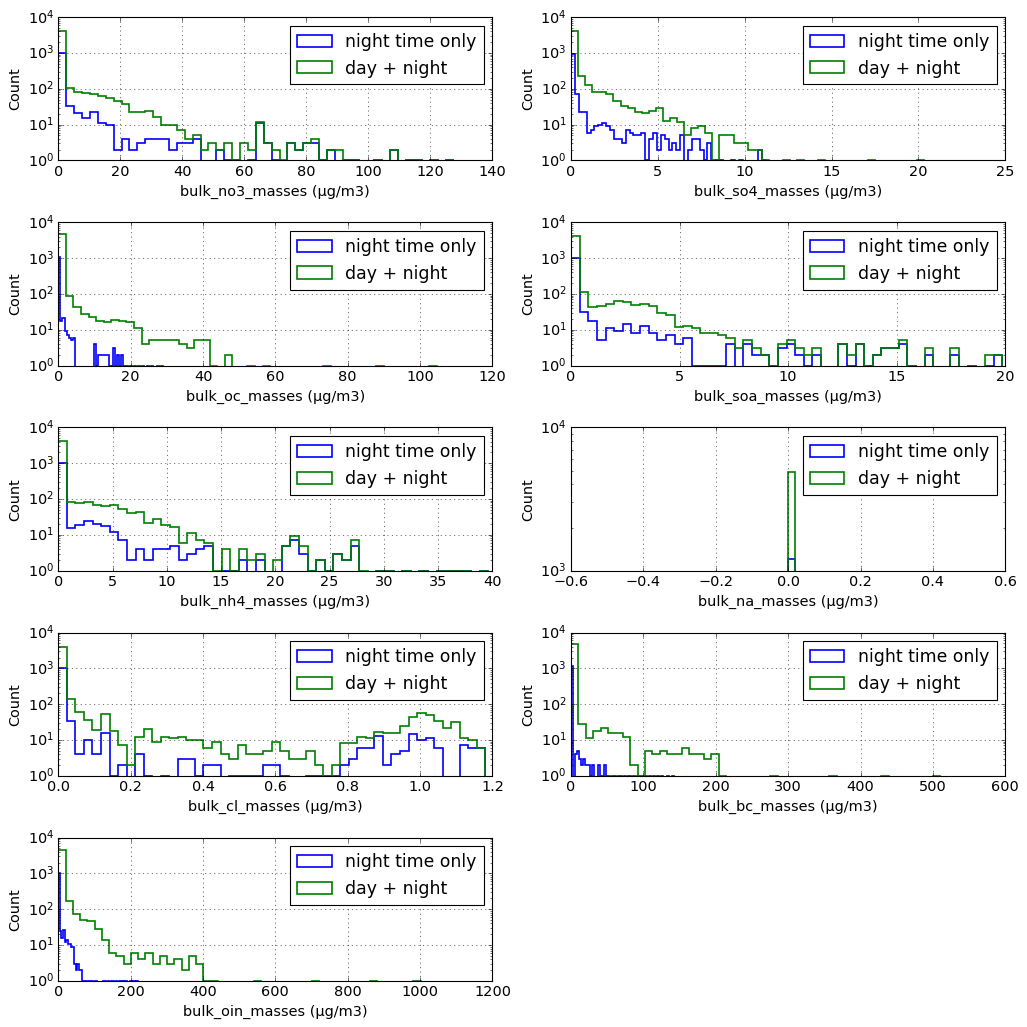

In [7]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(13,13))

for i in range(9):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_wdm_2ndngt, x = 'bulk_'+ s[i] + '_masses', bins = 50, histtype = 'step', lw = 1.5, label = 'night time only')
    plt.hist(data = df_wdm, x = 'bulk_'+ s[i] + '_masses', bins = 50, histtype = 'step', lw = 1.5, label = 'day + night')
    plt.xlabel('bulk_'+ s[i] + '_masses (µg/m3)')
    plt.yscale('log')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.grid()
    plt.legend()
    plt.tight_layout(pad = 1.0)

# composition distribution

In [8]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
dtype: object
bulk_no3_masses


In [9]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875/scenarios/scenario_0013'
nmass_frac_dist = np.zeros((10,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

<Figure size 1040x1040 with 0 Axes>

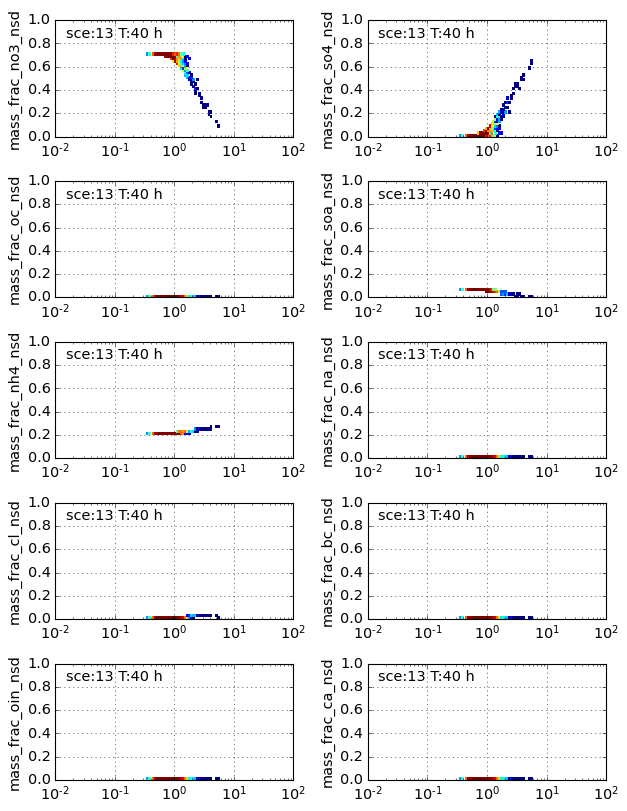

In [10]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(13,13))

plt.figure(figsize=(8,20))
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(10):
    plt.subplot(10,2,i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[i,40,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e2)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.ylabel("mass_frac_" + s[i] + "_nsd")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (13, 40))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

In [11]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
dtype: object
bulk_no3_masses


In [12]:
# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875/scenarios/scenario_0013'
bulk_masses = np.zeros((12,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename)
            for i in range(10):
                bulk_masses[i, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                bulk_masses[11, :] = ncf.variables['tot_drymass_conc'].data * 1e9

d_wdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:].ravel() + bulk_masses[3,:].ravel()}
df_wdm = pd.DataFrame(data=d_wdm)
print(df_wdm.shape)
df_wdm_2ndngt = df_wdm[((df_wdm.index.values % 49) >= 37) & ((df_wdm.index.values % 49) <= 48)]  # ngt: night
print(df_wdm_2ndngt.shape)

no3 = sum(bulk_masses[0,:].ravel())/sum(bulk_masses[11,:].ravel())
so4 = sum(bulk_masses[1,:].ravel())/sum(bulk_masses[11,:].ravel())
oc = sum(bulk_masses[2,:].ravel())/sum(bulk_masses[11,:].ravel())
soa = sum(bulk_masses[3,:].ravel())/sum(bulk_masses[11,:].ravel())
nh4 = sum(bulk_masses[4,:].ravel())/sum(bulk_masses[11,:].ravel())
na = sum(bulk_masses[5,:].ravel())/sum(bulk_masses[11,:].ravel())
cl = sum(bulk_masses[6,:].ravel())/sum(bulk_masses[11,:].ravel())
bc = sum(bulk_masses[7,:].ravel())/sum(bulk_masses[11,:].ravel())
oin = sum(bulk_masses[8,:].ravel())/sum(bulk_masses[11,:].ravel())
ca = sum(bulk_masses[9,:].ravel())/sum(bulk_masses[11,:].ravel())
co3 = sum(bulk_masses[10,:].ravel())/sum(bulk_masses[11,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3)

(49, 10)
(12, 10)
no3: 0.4000104362489881
so4: 0.2963929505444333
oc: 6.466683796506898e-09
soa: 0.031826829675344
nh4: 0.2396203192364388
na: 0.0
cl: 0.032149418891122244
bc: 3.847205002216509e-08
oin: 4.649400834756976e-10
ca: 0.0
co3: 0.0
1.0000000000000002


In [13]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875/scenarios/scenario_0090'
nmass_frac_dist = np.zeros((10,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            # print(filename)
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

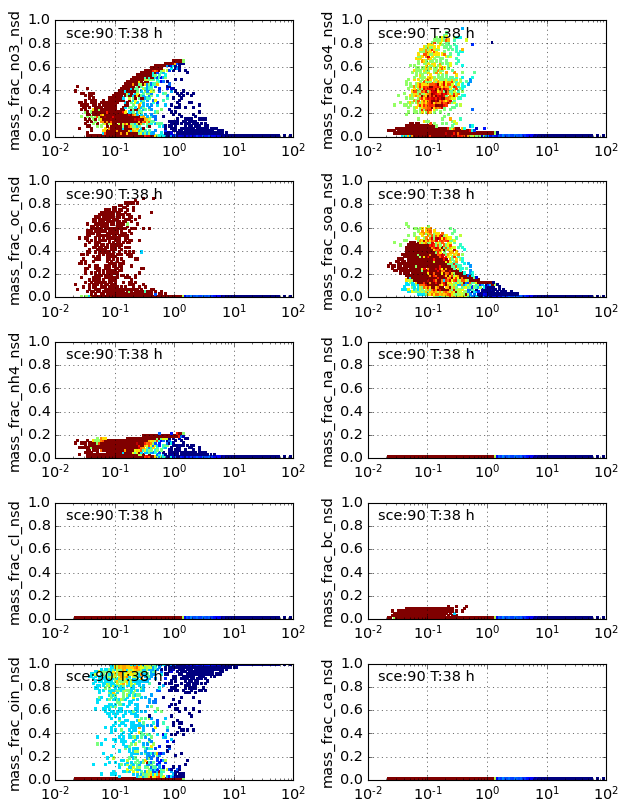

In [14]:
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(8,20))

X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(10):
    plt.subplot(10,2,i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[i,38,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e2)
    plt.xscale('log')
    # plt.ylim(0,1)
    plt.ylabel('mass_frac_' + s[i] + '_nsd')
    plt.yscale('linear')
    plt.text(0.015, 0.85, 'sce:%d T:%d h'% (90, 38))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

In [15]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
dtype: object
bulk_no3_masses


In [16]:
# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo/scenarios/scenario_0007'
bulk_masses = np.zeros((12,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename)
            for i in range(10):
                bulk_masses[i, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                bulk_masses[11, :] = ncf.variables['tot_drymass_conc'].data * 1e9

d_wdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:].ravel() + bulk_masses[3,:].ravel()}
df_wdm = pd.DataFrame(data=d_wdm)
print(df_wdm.shape)
df_wdm_2ndngt = df_wdm[((df_wdm.index.values % 49) >= 37) & ((df_wdm.index.values % 49) <= 48)]  # ngt: night
print(df_wdm_2ndngt.shape)

no3 = sum(bulk_masses[0,:].ravel())/sum(bulk_masses[11,:].ravel())
so4 = sum(bulk_masses[1,:].ravel())/sum(bulk_masses[11,:].ravel())
oc = sum(bulk_masses[2,:].ravel())/sum(bulk_masses[11,:].ravel())
soa = sum(bulk_masses[3,:].ravel())/sum(bulk_masses[11,:].ravel())
nh4 = sum(bulk_masses[4,:].ravel())/sum(bulk_masses[11,:].ravel())
na = sum(bulk_masses[5,:].ravel())/sum(bulk_masses[11,:].ravel())
cl = sum(bulk_masses[6,:].ravel())/sum(bulk_masses[11,:].ravel())
bc = sum(bulk_masses[7,:].ravel())/sum(bulk_masses[11,:].ravel())
oin = sum(bulk_masses[8,:].ravel())/sum(bulk_masses[11,:].ravel())
ca = sum(bulk_masses[9,:].ravel())/sum(bulk_masses[11,:].ravel())
co3 = sum(bulk_masses[10,:].ravel())/sum(bulk_masses[11,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3)

(49, 10)
(12, 10)
no3: 0.17292371358034261
so4: 0.029425029519263464
oc: 0.05217708958320484
soa: 0.03791555827590263
nh4: 0.06171485056210576
na: 0.0
cl: 0.004879486951821759
bc: 0.14827273593813545
oin: 0.49269153558922374
ca: 0.0
co3: 0.0
1.0000000000000004


# size distribution

In [17]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875'
h1_wds = np.zeros((100,49,180)) # gamma * surf_dist
h2_wds = np.zeros((100,49,180)) # surf_area_dist
hgamma_wds = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1_wds[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h2_wds[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            hgamma_wds[sce_index, t_index,:] = h1_wds[sce_index, t_index,:]/h2_wds[sce_index, t_index,:]

In [18]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776875'
surf_area_dist = np.zeros((100,49,180)) # for PR
mass_dist = np.zeros((100,49,180)) # for CA
num_dist = np.zeros((100,49,180))
no3_dist = np.zeros((100,49,180))
so4_dist = np.zeros((100,49,180))
wi_dist = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            surf_area_dist[sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            mass_dist[sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e9 # kg to µg
            num_dist[sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3
            no3_dist[sce_index,t_index,:] = ncf.variables["mass_no3_dist"].data*1e9
            so4_dist[sce_index,t_index,:] = ncf.variables["mass_so4_dist"].data*1e9
            wi_dist[sce_index,t_index,:] = so4_dist[sce_index,t_index,:]/(so4_dist[sce_index,t_index,:]+no3_dist[sce_index,t_index,:])

In [19]:
print(df_wdsallbelow.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_wdsallbelow.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wdsallbelow.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
3630       0.006655        0.003975       -40.275359
3631       0.006783        0.004074       -39.945416
3629       0.006400        0.003868       -39.574011
3632       0.006768        0.004095       -39.504216
3645       0.005994        0.003629       -39.448694
...             ...             ...              ...
4779       0.003800        0.003010       -20.798820
3877       0.005190        0.004115       -20.707039
4455       0.003785        0.003009       -20.511883
4446       0.003720        0.002968       -20.229984
738        0.004948        0.003949       -20.193192

[73 rows x 3 columns]
[74 74 74 74 74 23 79 79 74 79 97 74 79 74 74 74 74 74 97 74 79 74 74 64
 74 74 64 64 79 74 79 79 74 79  3 74 64 79 15 29 29 79 29 23 79 79 74 29
 79 29 29 29 79 74 23 90 90 29  3 90 90 90 90 90  3 90 29 29 97 79 90 90
 15]
[ 4  5  3  6 19  4 22 21  2 25 28  1 24  7 29 22 20 23 27 30 23 21 28 48
  0 27 47 46 32  8 31 26 26 30 18 31 45 29  

In [20]:
print(df_wdsbelow.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_wdsbelow.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wdsbelow.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
3184       0.010868        0.007441       -31.529056
3183       0.011638        0.008036       -30.945969
3182       0.013261        0.009254       -30.219452
3181       0.014517        0.010709       -26.234477
1173       0.009303        0.007088       -23.817459
4448       0.003861        0.003025       -21.652783
4447       0.003840        0.003011       -21.572502
4449       0.003847        0.003023       -21.411473
4450       0.003840        0.003019       -21.376149
4452       0.003825        0.003014       -21.201024
4451       0.003827        0.003018       -21.155462
4453       0.003816        0.003013       -21.054012
4454       0.003809        0.003013       -20.897192
4455       0.003785        0.003009       -20.511883
[64 64 64 64 23 90 90 90 90 90 90 90 90 90]
[48 47 46 45 46 38 37 39 40 42 41 43 44 45]
(14, 3)


<Figure size 1040x1040 with 0 Axes>

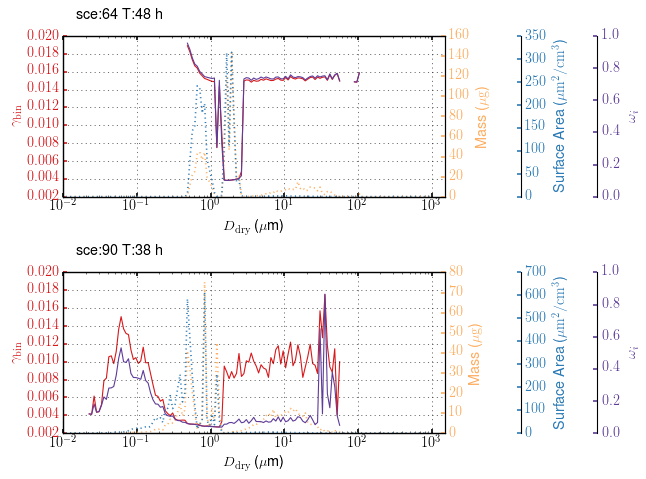

In [21]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(13,13))

fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([64,90])
t_index = pd.Series([48,38])

for i in range(2):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()
    twin3 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))
    twin3.spines['right'].set_position(("axes", 1.4))

    p1 = ax[i].plot(diam, hgamma_wds[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)
    p4 = twin3.plot(diam, wi_dist[sce_index[i], t_index[i], :], color = "#5e3c99", ls = '-')

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0.002,0.02)
    twin3.set_ylim(0, 1)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm \mu g$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin3.set_ylabel(r'$\omega_i$')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')
    twin3.yaxis.label.set_color('#5e3c99')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    twin3.tick_params(axis='y', colors='#5e3c99', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

<Figure size 640x1600 with 0 Axes>

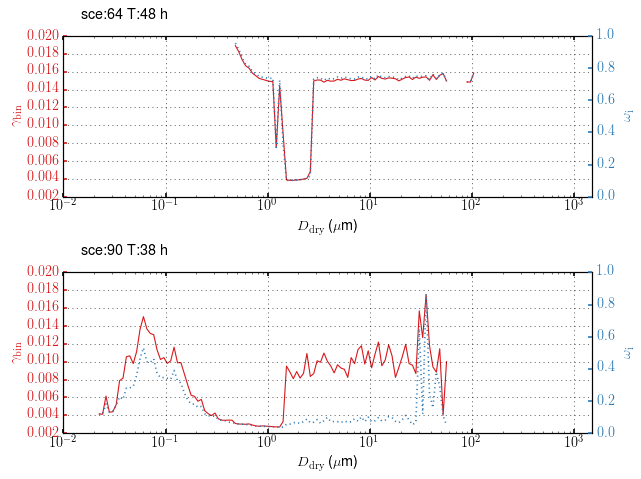

In [22]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(8,20))

fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([64,90])
t_index = pd.Series([48,38])

for i in range(2):
    twin1 = ax[i].twinx()

    p1 = ax[i].plot(diam, hgamma_wds[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, wi_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0.002,0.02)
    twin1.set_ylim(0, 1)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'$\rm \omega_i$')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

In [23]:
print(df_wdsallabove.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_wdsallabove.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wdsallabove.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
3746       0.008532        0.010248        20.110160
75         0.005926        0.007119        20.139037
3755       0.007297        0.008782        20.344440
3747       0.008279        0.009975        20.496208
2359       0.013399        0.016156        20.574491
...             ...             ...              ...
807        0.004002        0.009018       125.308940
786        0.003394        0.007898       132.708379
787        0.003507        0.008190       133.543044
785        0.003285        0.008103       146.659689
784        0.003220        0.008964       178.402392

[128 rows x 3 columns]
[76  1 76 76 48 76 13 76 76 76 76 76  1 76 76 13 13 13 76 13 13 13 13 13
 13 13 13 13 13 76 13 48 13 13 13  1 76 13 76 13 13 76 13 13 48 13 48  1
 13 13 13  1 76 13 76 76  1 76 48 13 13 76 13 13  1  1 13  1 13  1  1 13
  1 13 44  1 44  1  1 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16

In [24]:
print(df_wdsabove.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_wdsabove.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wdsabove.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
677        0.003357        0.004051        20.650753
3761       0.004525        0.005538        22.376740
676        0.003555        0.004360        22.646488
675        0.003887        0.004867        25.213497
91         0.003115        0.003902        25.268063
674        0.004356        0.005571        27.881043
88         0.010227        0.013151        28.580624
90         0.004214        0.005767        36.863511
89         0.006534        0.009155        40.107573
821        0.004940        0.008141        64.797766
822        0.004925        0.008180        66.098941
823        0.004923        0.008181        66.198233
824        0.004909        0.008198        66.992671
825        0.004939        0.008263        67.301649
827        0.004891        0.008204        67.721085
826        0.004910        0.008254        68.112802
830        0.004826        0.008114        68.126903
828        0.004878        0.008201        68.

<Figure size 1040x1040 with 0 Axes>

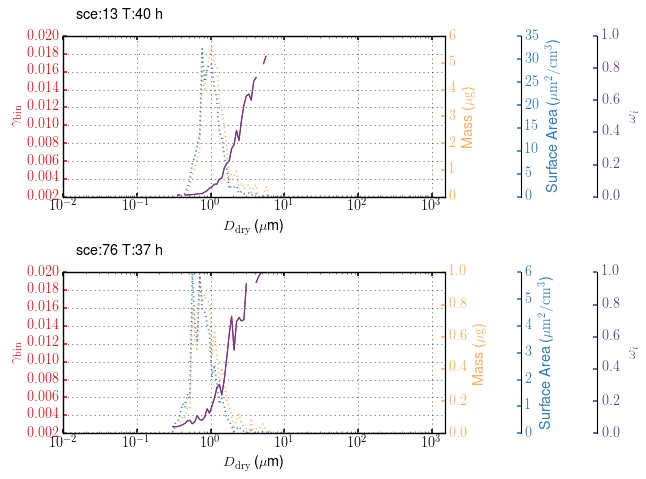

In [27]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(13,13))

fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([13,76])
t_index = pd.Series([40,37])

for i in range(2):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()
    twin3 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))
    twin3.spines['right'].set_position(("axes", 1.4))

    p1 = ax[i].plot(diam, hgamma_wds[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)
    p4 = twin3.plot(diam, wi_dist[sce_index[i], t_index[i], :], color = "#5e3c99", ls = '-')

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0.002,0.02)
    twin3.set_ylim(0, 1)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm \mu g$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin3.set_ylabel(r'$\omega_i$')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')
    twin3.yaxis.label.set_color('#5e3c99')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    twin3.tick_params(axis='y', colors='#5e3c99', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

<Figure size 640x1600 with 0 Axes>

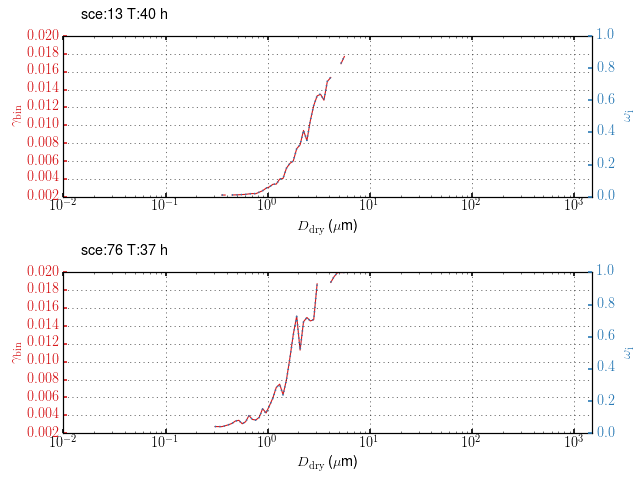

In [26]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(8,20))

fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([13,76])
t_index = pd.Series([40,37])

for i in range(2):
    twin1 = ax[i].twinx()

    p1 = ax[i].plot(diam, hgamma_wds[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, wi_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0.002,0.02)
    twin1.set_ylim(0, 1)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'$\rm \omega_i$')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#2c7bb6')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#2c7bb6', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

In [28]:
print(df_wdson.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_wdson.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wdson.shape)

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
4456       0.003758        0.003007       -19.992752
4457       0.003765        0.003013       -19.975725
4458       0.003782        0.003029       -19.889132
1458       0.003182        0.002653       -16.629273
1459       0.003089        0.002642       -14.491328
...             ...             ...              ...
382        0.011767        0.013948        18.538659
679        0.003144        0.003728        18.572026
384        0.010338        0.012258        18.576247
678        0.003231        0.003862        19.547624
383        0.010703        0.012822        19.793710

[475 rows x 3 columns]
[90 90 90 29 29 72 72 72 29 52 74 74 52 74 29 79 52 29 79 74 79 29 52 79
 29 79 52 79 52 72 79 72 29 72 72 72 79 72 72 29 72 50 72 50 23 50 29 43
 43 29  3 52 43 74 79  3  3 29 35 35 50 43  3 50 50 50 50 50  3 50 50 98
 43 52 50 98 98  3 79 43 52 98 23 44  3 12 12 12 14 43 98 14 12 12  3 12
 12 74 12 12  3 23 23 23 23 97 77 77 98 23 77 60

<Figure size 1040x1040 with 0 Axes>

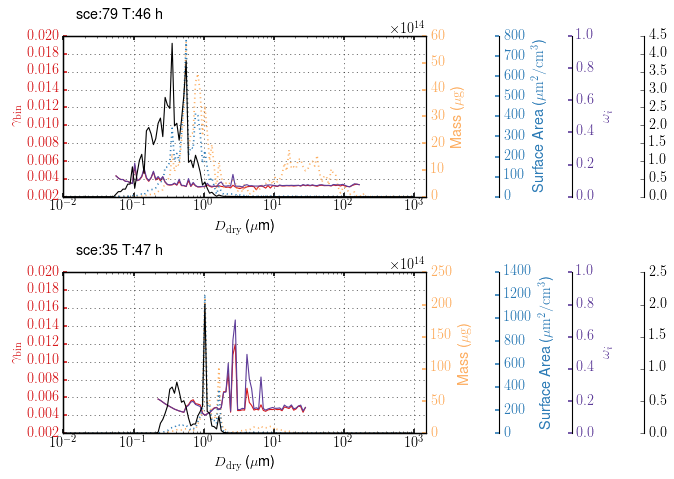

In [32]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(13,13))

fig, ax = plt.subplots(2,figsize=(8,6))
fig.subplots_adjust(right=0.75)

sce_index = pd.Series([79,35])
t_index = pd.Series([46,47])

for i in range(2):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()
    twin3 = ax[i].twinx()
    twin4 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))
    twin3.spines['right'].set_position(("axes", 1.4))
    twin4.spines['right'].set_position(("axes", 1.6))

    p1 = ax[i].plot(diam, hgamma_wds[sce_index[i], t_index[i],:], color = "#d7191c", ls = '-')
    p2 = twin1.plot(diam, mass_dist[sce_index[i], t_index[i], :], color = "#fdae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, surf_area_dist[sce_index[i], t_index[i], :], color = "#2c7bb6", ls = ':', lw = 1.5)
    p4 = twin3.plot(diam, wi_dist[sce_index[i], t_index[i], :], color = "#5e3c99", ls = '-')
    p5 = twin4.plot(diam, num_dist[sce_index[i], t_index[i],:], color = "k", ls = '-')

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1.5e3)
    ax[i].set_ylim(0.002,0.02)
    twin3.set_ylim(0, 1)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$')
    twin1.set_ylabel(r'Mass ($\rm \mu g$)')
    twin2.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin3.set_ylabel(r'$\omega_i$')

    ax[i].yaxis.label.set_color('#d7191c')
    twin1.yaxis.label.set_color('#fdae61')
    twin2.yaxis.label.set_color('#2c7bb6')
    twin3.yaxis.label.set_color('#5e3c99')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#d7191c', **tkw)
    twin1.tick_params(axis='y', colors='#fdae61', **tkw)
    twin2.tick_params(axis='y', colors='#2c7bb6', **tkw)
    twin3.tick_params(axis='y', colors='#5e3c99', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    ax[i].grid()
    ax[i].text(0.015, 0.022, r'sce:%d T:%d h'% (sce_index[i], t_index[i]))
    plt.tight_layout(pad=0.5)

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')